# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

In [16]:
import pandas as pd

df = pd.read_csv("Covid_Data.csv")
df['date'] = pd.to_datetime(df['date'])
print(df.head())


        date       location  new_cases  total_cases  new_deaths  total_deaths  \
0 2025-12-01  United States      50000      5000000        1000         80000   
1 2025-12-02  United States      48000      5048000         950         80950   
2 2025-12-03  United States      47000      5095000         900         81850   
3 2025-12-01          India      60000      4500000        1200         70000   
4 2025-12-02          India      59000      4559000        1150         71150   

   population  
0   331000000  
1   331000000  
2   331000000  
3  1393000000  
4  1393000000  


In [17]:
# Convert date to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter a few countries for visualization
countries = ['United States', 'India', 'Brazil']
df_filtered = df[df['location'].isin(countries)]


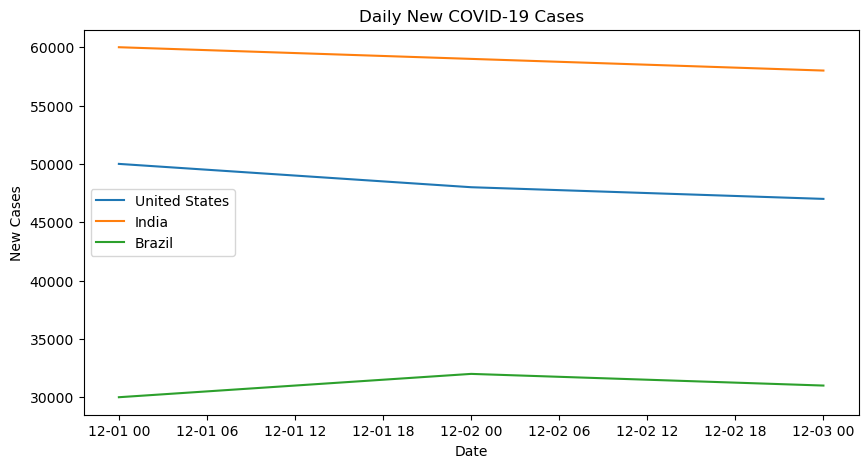

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


Visualization 1:
The Daily cases of the Covid 19 wave fluctates over time, showing waves in each individual country. Peaks of the Disease happen to start occuring around different times and this is a reflection of the local and global outbreaks with policy differences.

In [19]:
import plotly.express as px

latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

fig = px.choropleth(
    latest_data,
    locations='location',
    locationmode='country names',
    color='total_cases',
    color_continuous_scale='OrRd',
    title=f'Total COVID-19 Cases by Country on {latest_date.date()}'
)
fig.show()



Visualization 2:
The Map represents the total number of cases in vary with the spread across wide areas across the countries. U.S>, India, including Brazil have very higher totals, with the smaller countries they have reported very fewer cases.

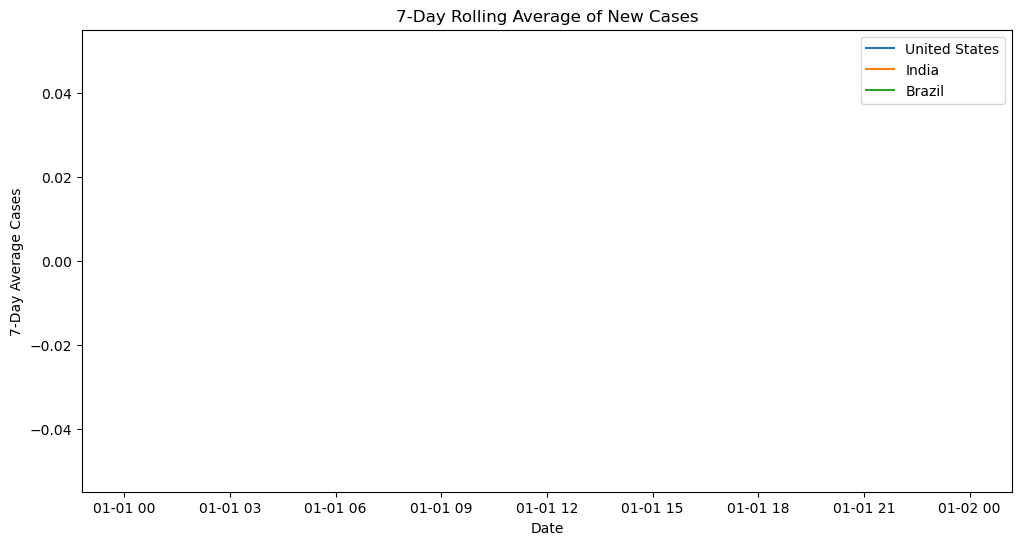

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Covid_data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter out any missing values in 'new_cases'
df_filtered = df.dropna(subset=['new_cases'])

# Define countries to plot
countries = ['United States', 'India', 'Brazil']  # example, replace with any

# Plot 7-day rolling average
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country].sort_values('date')
    rolling_avg = country_data['new_cases'].rolling(window=7).mean()
    plt.plot(country_data['date'], rolling_avg, label=country)

plt.title("7-Day Rolling Average of New Cases")
plt.xlabel("Date")
plt.ylabel("7-Day Average Cases")
plt.legend()
plt.show()




Visualization 3:
This graph shows the rolling avergae with smooth daily fluctions making trends easioer to see. What we see is a clear observation of the timing and magnitude of waves for each individual country.